In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data/stud.csv')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [10]:
df.isna().sum

<bound method DataFrame.sum of      gender  race_ethnicity  parental_level_of_education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test_preparation_course  math_score  reading_score  writing_score  
0                      False       False          False          False  
1                 

In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print("categories in gender variable: ", end="")
print(df['gender'].unique())
print("categories in race_ethnicity variable: ", end="")
print(df['race_ethnicity'].unique())
print("categories in parental_level_of_education variable: ", end="")
print(df['parental_level_of_education'].unique())

print("categories in lunch variable: ", end="")
print(df['lunch'].unique())
print("categories in test_preparation_course variable: ", end="")
print(df['test_preparation_course'].unique())

categories in gender variable: ['female' 'male']
categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable: ['standard' 'free/reduced']
categories in test_preparation_course variable: ['none' 'completed']


In [24]:
# define categorical and numerical columns

categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']

In [26]:
print(f"we have total catgorical features: {len(categorical_features)} and these are {categorical_features}")
print(f"we have total numerical features: {len(numerical_features)} and these are {numerical_features}")

we have total catgorical features: 5 and these are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
we have total numerical features: 3 and these are ['math_score', 'reading_score', 'writing_score']


In [27]:
# creating two output features- total_score and average

df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
math_full = df[df['math_score']==100]['math_score'].count()
reading_full = df[df['reading_score']==100]['reading_score'].count()
writing_full = df[df['writing_score']==100]['writing_score'].count()

In [37]:
print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [38]:
math_full = df[df['math_score']<=20]['math_score'].count()
reading_full = df[df['reading_score']<=20]['reading_score'].count()
writing_full = df[df['writing_score']<=20]['writing_score'].count()

In [39]:
print(f"Number of students with less than 20 marks in math: {math_full}")
print(f"Number of students with less than 20 in reading: {reading_full}")
print(f"Number of students with less than 20 in writing: {writing_full}")

Number of students with less than 20 marks in math: 4
Number of students with less than 20 in reading: 1
Number of students with less than 20 in writing: 3


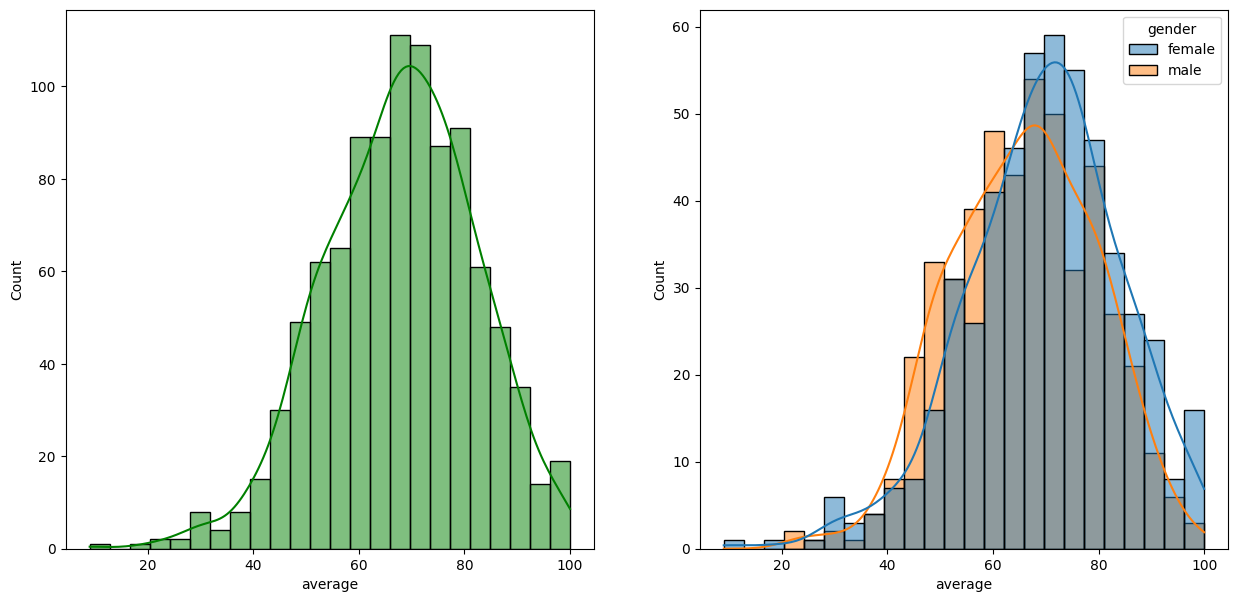

In [44]:
### Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()